In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder
import pydotplus

import warnings
warnings.filterwarnings("ignore")

In [45]:
df = sns.load_dataset("titanic")

In [46]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [48]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [49]:
df.duplicated().sum()

np.int64(107)

In [50]:
df.drop(columns = ['deck', 'embark_town', 'who', 'class'], inplace=True)

In [51]:
df['age'].fillna(df['age'].mean(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

In [52]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

In [53]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
adult_male    0
alive         0
alone         0
dtype: int64

In [54]:
df.drop_duplicates(inplace=True)

In [55]:
df.duplicated().sum()

np.int64(0)

In [56]:
df.shape

(780, 11)

In [57]:
cat_col = df.select_dtypes(include='object').columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

survived


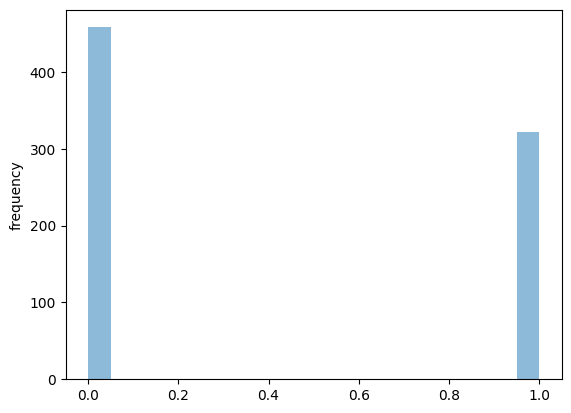

pclass


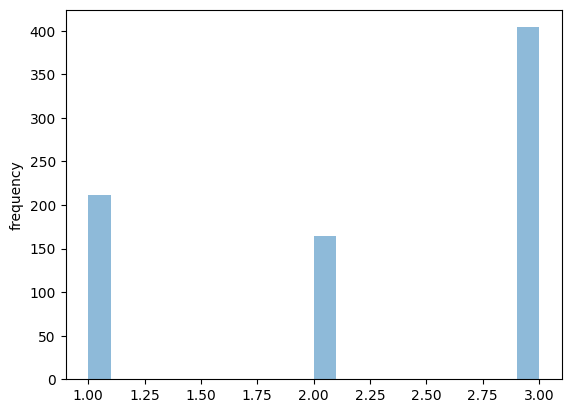

sex


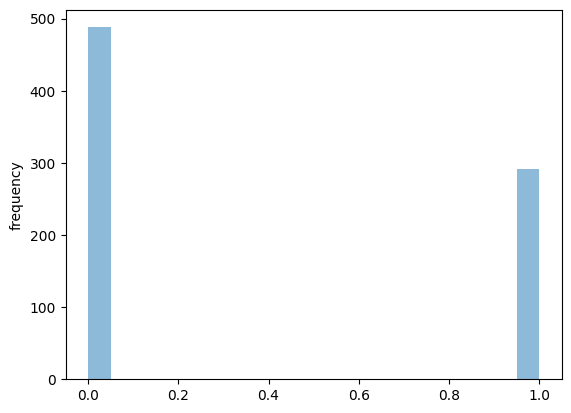

age


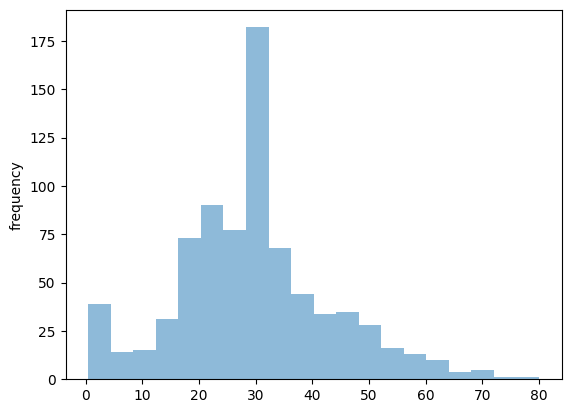

sibsp


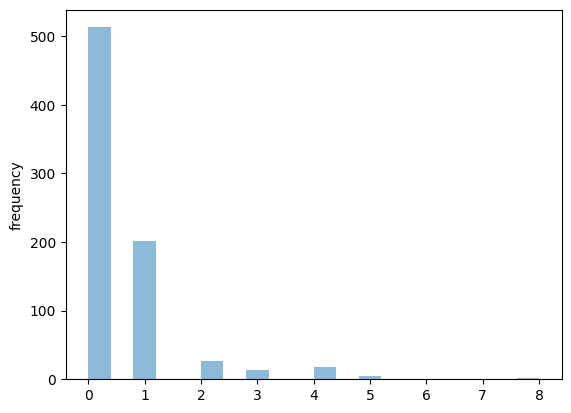

parch


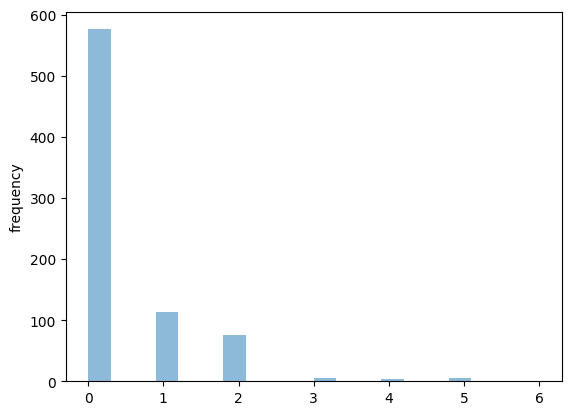

fare


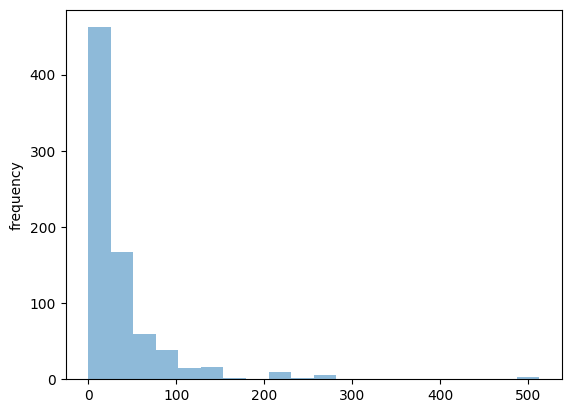

In [58]:
for col in num_col:
    print(col)
    plt.subplot(1,1,1)
    df[col].plot(kind = 'hist', alpha = 0.5, bins = 20)
    plt.ylabel('frequency')
    plt.show()

embarked


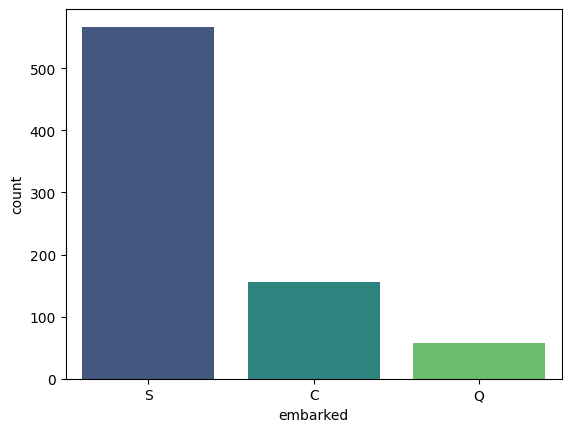

alive


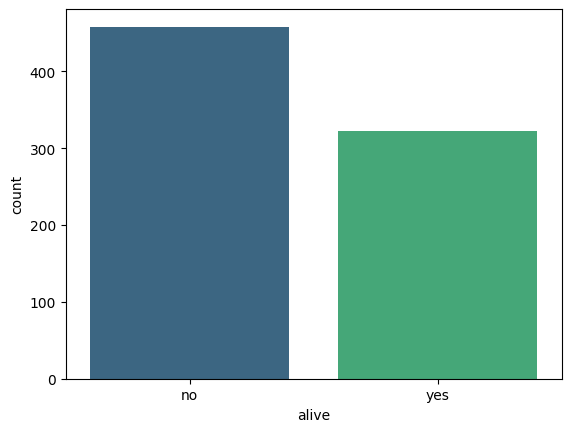

In [59]:
for col in cat_col:
    print(col)
    plt.figure()
    plt.subplot(1,1,1)
    sns.countplot(x = col, data =  df, order = df[col].value_counts().index, palette='viridis')
    plt.show()

<Axes: >

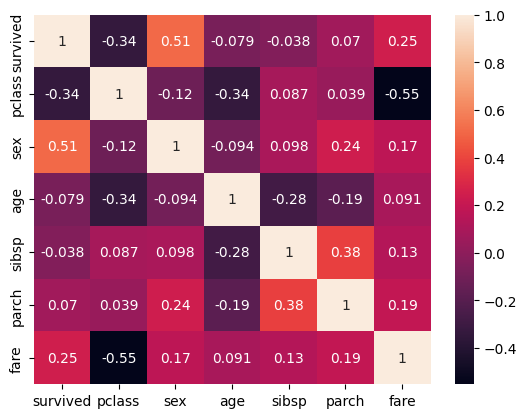

In [60]:
sns.heatmap(df[num_col].corr(), annot = True)

In [61]:
grouped_data = {
    'sex_survived': df.groupby(['sex', 'survived']).agg({'survived':'count'}),
    'pclass_survived': df.groupby(['pclass', 'survived']).agg({'survived':'count'}),
    'adult_male_survived': df.groupby(['adult_male', 'survived']).agg({'survived':'count'}),
    'embark_town_survived': df.groupby(['embarked', 'survived']).agg({'survived':'count'}),
    'alone_survived': df.groupby(['alone', 'survived']).agg({'survived':'count'}),
    'sibsp_survived': df.groupby(['sibsp', 'survived']).agg({'survived':'count'}),
    'parch_survived': df.groupby(['parch', 'survived']).agg({'survived':'count'})
}

In [62]:
for values in grouped_data.values():
    print(values)

              survived
sex survived          
0   0              382
    1              106
1   0               76
    1              216
                 survived
pclass survived          
1      0               77
       1              135
2      0               81
       1               83
3      0              300
       1              104
                     survived
adult_male survived          
False      0               95
           1              237
True       0              363
           1               85
                   survived
embarked survived          
C        0               65
         1               90
Q        0               38
         1               20
S        0              355
         1              212
                survived
alone survived          
False 0              165
      1              173
True  0              293
      1              149
                survived
sibsp survived          
0     0              317
      1              196


In [63]:
x = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y =df['survived']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [64]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

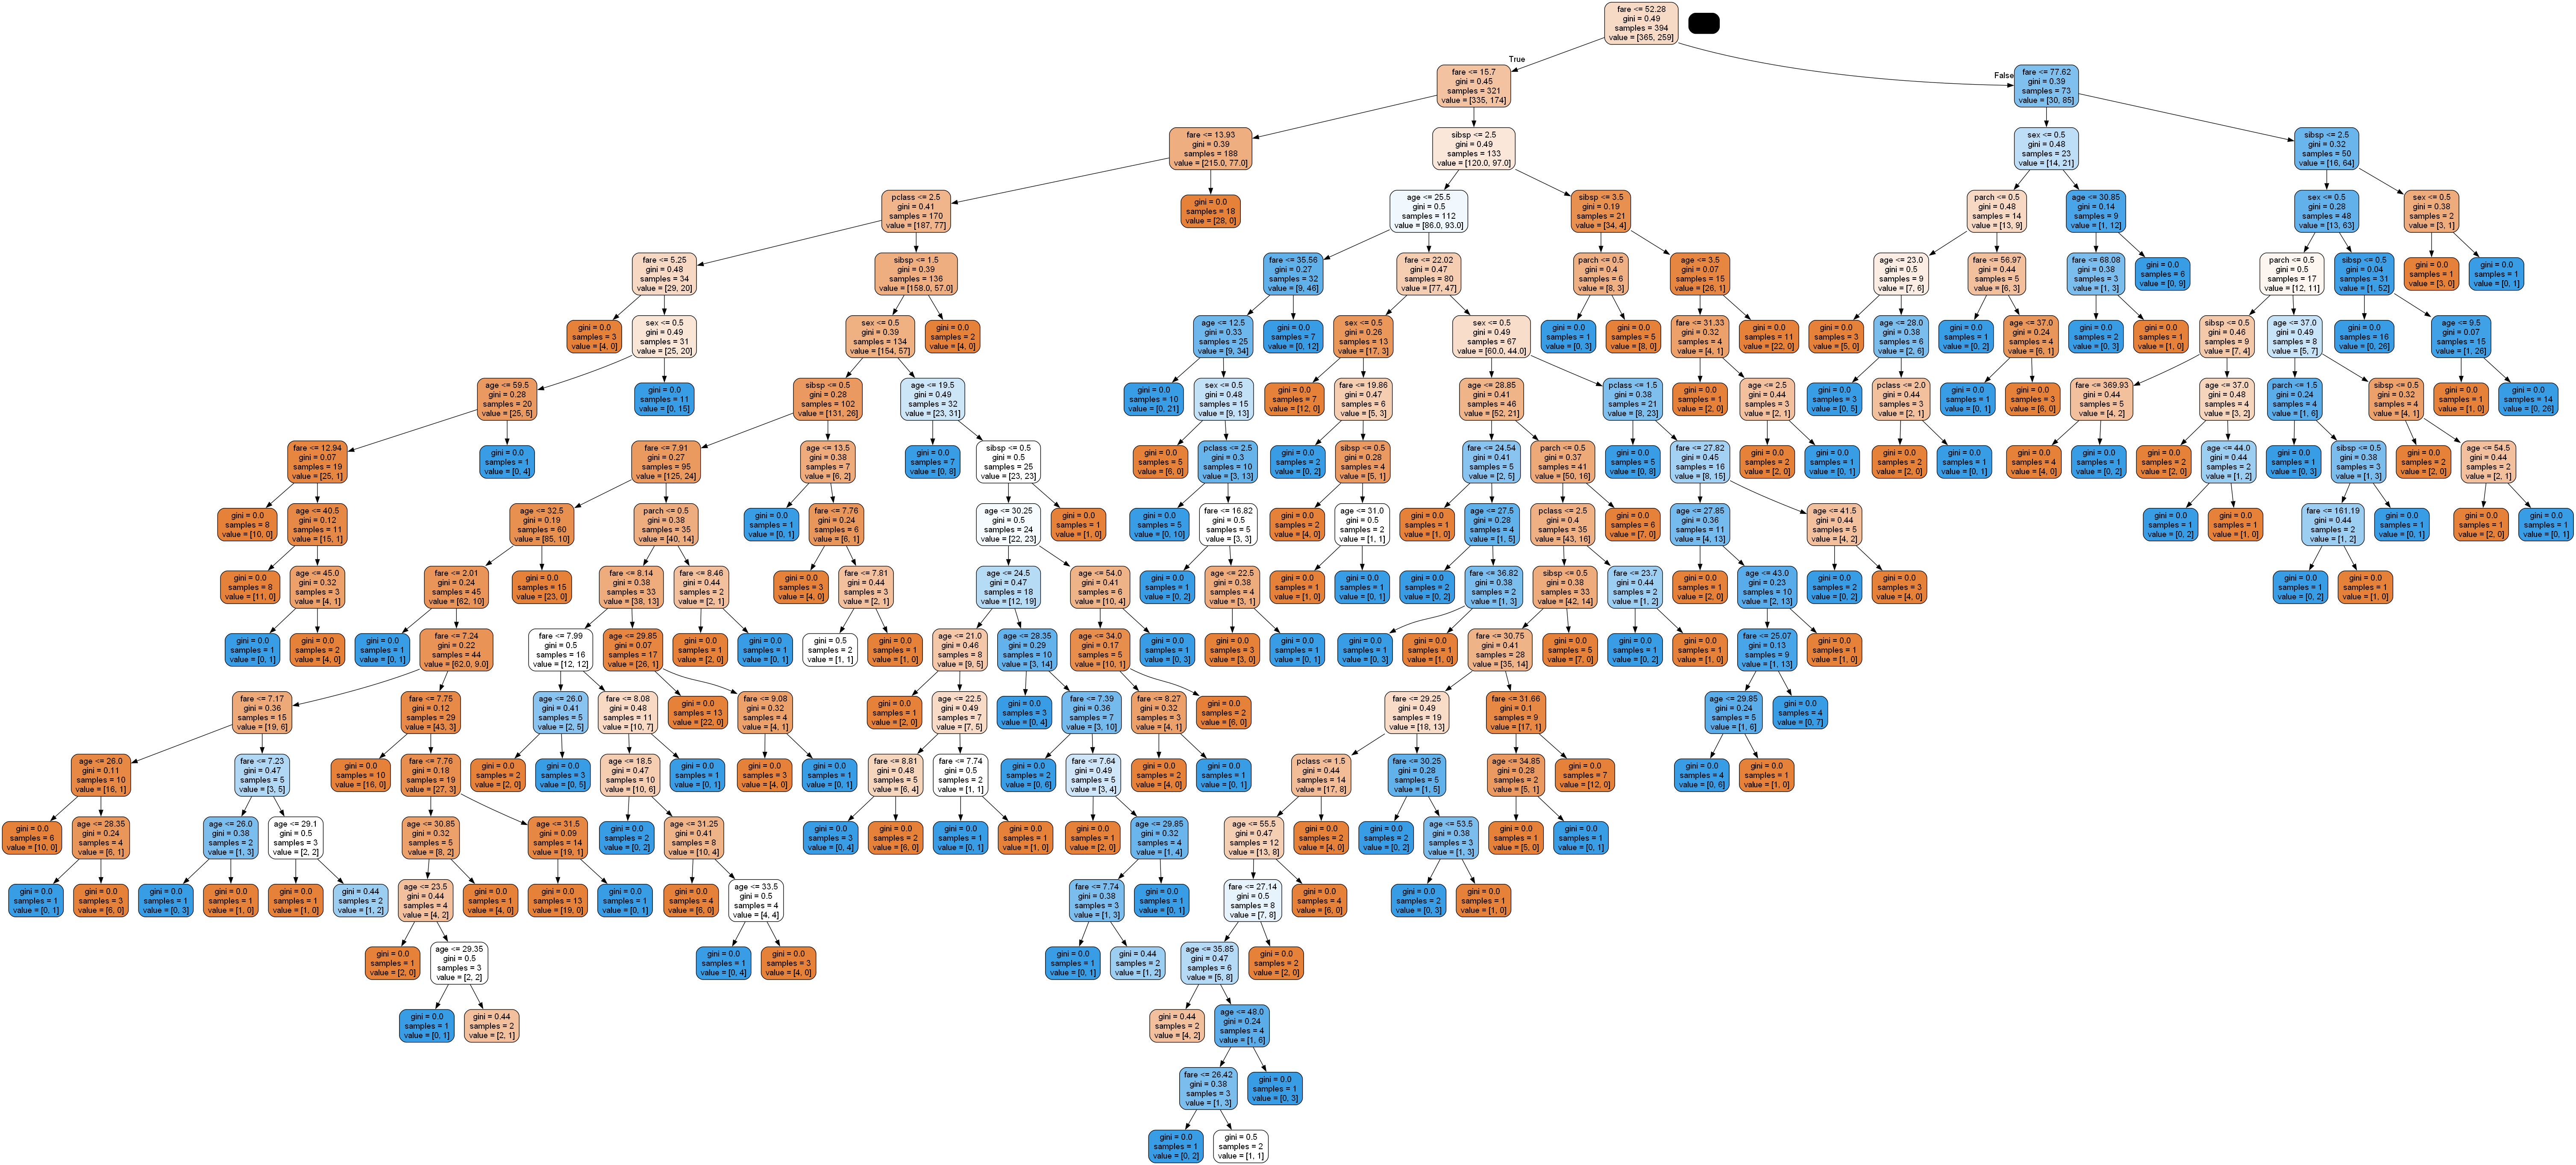

In [65]:
estimator = model.estimators_[3]
dot_data = export_graphviz(estimator, out_file=None, feature_names=X_train.columns, rounded =True, proportion = False, precision = 2, filled = True)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [66]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("classification_report: ", classification_rep)

Accuracy:  0.75
classification_report:                precision    recall  f1-score   support

           0       0.78      0.79      0.79        91
           1       0.70      0.69      0.70        65

    accuracy                           0.75       156
   macro avg       0.74      0.74      0.74       156
weighted avg       0.75      0.75      0.75       156



In [67]:
#'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'
new = [[0,1,25,1,1,70]]
y_pred_new = model.predict(new)
print(y_pred_new)

[1]
